<a href="https://colab.research.google.com/github/theselfobsessedgeek/BearClassifierUsingTf/blob/main/BearClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import tensorflow as tf
import numpy as np 
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.preprocessing import image   
from tensorflow.keras import datasets,models,layers

In [58]:
!pip install Pillow


In [75]:
import os
import re
from PIL import Image

# if 'grizzly_pngs' not in os.listdir('/content/drive/MyDrive/bears/black/'):
#     os.mkdir('/content/drive/MyDrive/bears/black_pngs')

for i in os.listdir('/content/drive/MyDrive/bears/teddy/'):
    name = re.findall('(.+)\.',i)
    print(name[0])
    img = Image.open('/content/drive/MyDrive/bears/teddy/'+i)
    img.save('./pngs/'+name[0]+'.png','png')

print('All done!')

00000020
00000035
00000105
00000121
00000123
00000016
00000134
00000051
00000071
00000112
00000045
00000004
00000149
00000001
00000010
00000075
00000038
00000031
00000131
00000100
00000094
00000128
00000052
00000046
00000124
00000014
00000083
00000084
00000074
00000018
00000106
00000054
00000049
00000059
00000138
00000139
00000067
00000130
00000047
00000140
00000064
00000092
00000126
00000029
00000028
00000032
00000003
00000097
00000146
00000116
00000135
00000088
00000021
00000002
00000082
00000096
00000043
00000027
00000119
00000073
00000024
00000142
00000058
00000005
00000114
00000017
00000087
00000012
00000009
00000136
00000107
00000015
00000040
00000050
00000141
00000089
00000077
00000037
00000069
00000085
00000070
00000129
00000055
00000086
00000066
00000006
00000008
00000068
00000026
00000011
00000115
00000104
00000019
00000108
00000148
00000099
00000120
00000079
00000076
00000132
00000102
00000061
00000098
00000056
00000033
00000111
00000044
00000022
00000109
00000042
00000117
0

In [92]:
img_height = 128
img_width = 128
batch_size = 8

In [93]:
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/data",
    labels="inferred",
    label_mode="int",
    # class_names=['0', '1', '2', '3', ...]
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_height, img_width),  # reshape if not in this size
    shuffle=True,
    seed=123,
    validation_split=0.4,
    subset="training",
)

Found 409 files belonging to 3 classes.
Using 246 files for training.


In [94]:
ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/data",
    labels="inferred",
    label_mode="int",
    # class_names=['0', '1', '2', '3', ...]
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_height, img_width),  # reshape if not in this size
    shuffle=True,
    seed=123,
    validation_split=0.1,
    subset="validation",
)

Found 409 files belonging to 3 classes.
Using 40 files for validation.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


InvalidArgumentError: ignored

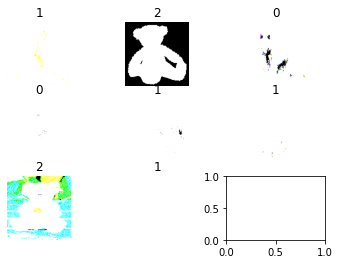

In [124]:
for images, labels in ds_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().)
        plt.title(int(labels[i]))
        plt.axis("off")

In [111]:
model = keras.Sequential(
    [
        layers.Input(shape=(128, 128, 3)),
        layers.Conv2D(128, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(256, 3,activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(64,activation='relu'),
        layers.Dense(3,activation='sigmoid')
    ]
)

In [112]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [113]:
model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 126, 126, 128)     3584      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 63, 63, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 61, 61, 256)       295168    
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 30, 30, 256)      0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 230400)            0         
                                                                 
 dense_12 (Dense)            (None, 64)              

In [114]:
history = model.fit(ds_train, epochs=10,verbose=2,validation_data= ds_validation)

Epoch 1/10
31/31 - 60s - loss: 66.8666 - accuracy: 0.3984 - val_loss: 5.0547 - val_accuracy: 0.5500 - 60s/epoch - 2s/step
Epoch 2/10
31/31 - 59s - loss: 0.5601 - accuracy: 0.8699 - val_loss: 1.6780 - val_accuracy: 0.8250 - 59s/epoch - 2s/step
Epoch 3/10
31/31 - 60s - loss: 0.0705 - accuracy: 0.9797 - val_loss: 1.5215 - val_accuracy: 0.7250 - 60s/epoch - 2s/step
Epoch 4/10
31/31 - 59s - loss: 0.0087 - accuracy: 1.0000 - val_loss: 1.3949 - val_accuracy: 0.8500 - 59s/epoch - 2s/step
Epoch 5/10
31/31 - 59s - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.4504 - val_accuracy: 0.8500 - 59s/epoch - 2s/step
Epoch 6/10
31/31 - 60s - loss: 8.1456e-04 - accuracy: 1.0000 - val_loss: 1.4564 - val_accuracy: 0.8500 - 60s/epoch - 2s/step
Epoch 7/10
31/31 - 60s - loss: 5.3862e-04 - accuracy: 1.0000 - val_loss: 1.4726 - val_accuracy: 0.8500 - 60s/epoch - 2s/step
Epoch 8/10
31/31 - 60s - loss: 3.1826e-04 - accuracy: 1.0000 - val_loss: 1.5395 - val_accuracy: 0.8500 - 60s/epoch - 2s/step
Epoch 9/10
31/31 - 

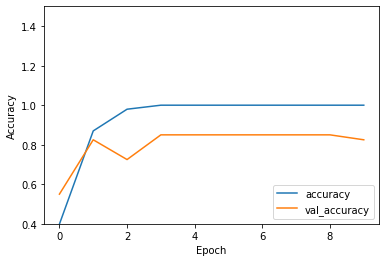

In [121]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1.5])
plt.legend(loc='lower right')

In [137]:

img_data = image.load_img('/content/images/00000043.jpeg', target_size = (128, 128))   #load the image from the directory
img_data = image.img_to_array(img_data)                            #convert the image to a Numpy array
img_data = np.expand_dims(img_data, axis = 0)                     #expands the array by inserting a new axis at the specified position.

classify = model.predict(img_data)
print(classify[0])
if(classify[0][0]>classify[0][1] and classify[0][0]>classify[0][2]):
  print('black bear')
if(classify[0][1]>classify[0][2] and classify[0][1]>classify[0][0]):
  print('grizzly bear')
if(classify[0][2]>classify[0][1] and classify[0][2]>classify[0][0]):
  print('teddy bear')

[1.3514650e-08 9.9811375e-01 1.0000000e+00]
teddy bear


In [138]:
img_data = image.load_img('/content/images/test.png', target_size = (128, 128))   #load the image from the directory
img_data = image.img_to_array(img_data)                            #convert the image to a Numpy array
img_data = np.expand_dims(img_data, axis = 0)                     #expands the array by inserting a new axis at the specified position.

classify = model.predict(img_data)
print(classify[0])
if(classify[0][0]>classify[0][1] and classify[0][0]>classify[0][2]):
  print('black bear')
if(classify[0][1]>classify[0][2] and classify[0][1]>classify[0][0]):
  print('grizzly bear')
if(classify[0][2]>classify[0][1] and classify[0][2]>classify[0][0]):
  print('teddy bear')

[6.9121456e-01 9.9912870e-01 2.0489097e-04]
grizzly bear
